# Deborah Sani, Project 1: Investigating TMBD Dataset


Table of Contents
 . Introduction
 . Data Wranggling
 . Exploratory Data Analysis
 . Conclusion

## Introduction

The dataset is from TMBD and comes from  information that contained about 10,000 movies, short films and TV series collected from the movie database (TMBD), including user ratings. revenue. runtime and budget.





### Dataset Description

The dataset is from TMBD and comes from  information that contained about 10,000 movies, short films and TV series collected from the movie database (TMBD), including user ratings. revenue. runtime and budget.

The dataset is from imbd movies and dowloaded from https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
.Certain columns like 'cast' and 'genres',contain multiple values seperated by pipe(|) characters
.There are some odd characters in the 'cast' column.
. The final two columns ending with "_adj" shows the budgetand revenue of associated movies in terms of 2010 dollars,accounting for inflation over time

### Question(s) for Analysis
1.Which year have the highest release movie?
2.Which movies have the highest and lowest profit?

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib. pyplot as plt

In [82]:
data = pd.read_csv('C:/Users/Admin/Desktop/Adobe/tmdb-movies.csv')
data.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [83]:
data. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [76]:
# print the first five rows of the dataset
data.head(5)

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [77]:
#print last five rows of the dataset
data.tail(5)

id    imdb_id  popularity  budget  revenue  \
10861     21  tt0060371    0.080598       0        0   
10862  20379  tt0060472    0.065543       0        0   
10863  39768  tt0060161    0.065141       0        0   
10864  21449  tt0061177    0.064317       0        0   
10865  22293  tt0060666    0.035919   19000        0   

                 original_title  \
10861        The Endless Summer   
10862                Grand Prix   
10863       Beregis Avtomobilya   
10864    What's Up, Tiger Lily?   
10865  Manos: The Hands of Fate   

                                                    cast homepage  \
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...      NaN   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...      NaN   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...      NaN   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...      NaN   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...      NaN   

                 director                                            tagline  \
10861         Bruce Brown                                                NaN   
10862  John Frankenheimer  Cinerama sweeps YOU into a drama of speed and ...   
10863      Eldar Ryazanov                                                NaN   
10864         Woody Allen                          WOODY ALLEN STRIKES BACK!   
10865    Harold P. Warren       It's Shocking! It's Beyond Your Imagination!   

       ...                                           overview runtime  \
10861  ...  The Endless Summer, by Bruce Brown, is one of ...      95   
10862  ...  Grand Prix driver Pete Aron is fired by his te...     176   
10863  ...  An insurance agent who moonlights as a carthie...      94   
10864  ...  In comic Woody Allen's film debut, he took the...      80   
10865  ...  A family gets lost on the road and stumbles up...      74   

                       genres  \
10861             Documentary   
10862  Action|Adventure|Drama   
10863          Mystery|Comedy   
10864           Action|Comedy   
10865                  Horror   

                                    production_companies release_date  \
10861                                  Bruce Brown Films      6/15/66   
10862  Cherokee Productions|Joel Productions|Douglas ...     12/21/66   
10863                                            Mosfilm       1/1/66   
10864                            Benedict Pictures Corp.      11/2/66   
10865                                          Norm-Iris     11/15/66   

      vote_count  vote_average  release_year     budget_adj  revenue_adj  
10861         11           7.4          1966       0.000000          0.0  
10862         20           5.7          1966       0.000000          0.0  
10863         11           6.5          1966       0.000000          0.0  
10864         22           5.4          1966       0.000000          0.0  
10865         15           1.5          1966  127642.279154          0.0  

[5 rows x 21 columns]

In [78]:
#print a summary to describe the dataset
data.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

Let's find the null values contained in the row of each column

In [79]:
#since the dataset contain null values also
#count the total row in each column wg=hich contain null values
data.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

# Data Cleaning (here we be removing informations that are not useful from the dataset

.Here we need to remove duplicate rows from the dataset
.Change the format of release date into datetime format
.Remove unused columns that are not needed for this data analysis process
.Remove the movies which are having zero value of budget and revenue

Remove duplicate rows

In [80]:
#'duplicated()' function in pandas as return, return the duplicate row as True and others as False
#for counting the duplicate elements we sum up all the rows
sum(data.duplicated())

1

In [57]:
#After calculating the duplicate row we can drop these row using 'drop_duplicates()' function
data.drop_duplicates(inplace = True)
#After removing duplicates value from the dataset
print("After Removing Duplicate Values(Rows,Columns) :",data.shape)

After Removing Duplicate Values(Rows,Columns) : (10865, 21)


Change the format of release Date into Datetime format

In [58]:
# As given in the dataset is in string format
#so we need to changethis in the dataset

data['release_date'] = pd.to_datetime(data['release_date'])
data['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

Remove the unsed columns that are not important for the data analysis process

From the dataset  we discovered 21 columns, to drop the column we need to remove unuseful columns that are not needed for the analysis process. columns like: imbd_id, homepage, tagline,overview,budget_adj and revenue_adj are not required for my analysis so i will drop these columns.

In [59]:
#we can see that 21 column in the dataset , we can drop thhem using drop function
data.drop(['budget_adj', 'revenue_adj','overview','homepage','tagline'],axis = 1, inplace = True)
print("After Removing Unused Columns (Rows,Columns) :",data.shape)

After Removing Unused Columns (Rows,Columns) : (10865, 16)


In [60]:
#check for zero value in the budget and revenue columns
print("Rows With Zero Values In The Budget Column:",data[(data['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",data[(data['revenue']==0)].shape[0])

Rows With Zero Values In The Budget Column: 5696
Rows With Zero Values In The Revenue Column: 6016


# Exploratory Data Analysis

Research Question 1 (Which year have the highest release of movies?)

In [61]:
#let us make a group for each year and count the number of movies in each year
data_by_release_year = data.groupby(['release_year']).id.count()
data_by_release_year.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

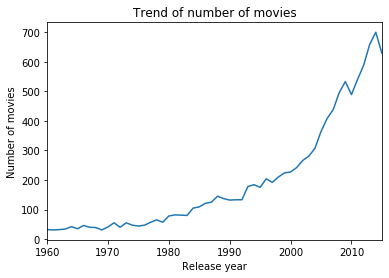

In [62]:
# let plot a graph to show the relationship between release year and numbers of movies
data_by_release_year = data.groupby(['release_year']).id.count()
data_by_release_year.plot()
plt.title('Trend of number of movies')
plt.xlabel('Release year')
plt.ylabel('Number of movies')
plt.show()

From the above graph i concluded that year 2014 has the highest release movie(700) followed byyear 2013(659) and 2015 (629)

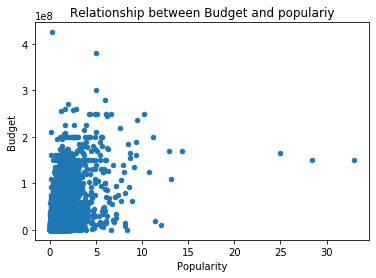

In [63]:
# lets plot a scattered plot to show relationship between 'popularity' and 'budget'
data.plot.scatter(x='popularity', y='budget')
plt.title('Relationship between Budget and populariy')
plt.xlabel('Popularity')
plt.ylabel('Budget')
plt.show()

Research Question 2: Which Movies have the highest or lowest profit?

In [64]:
#find the movie with the highest and lowest profit.
import numpy as np
data['profit'] = data['revenue'] - data['budget'] 

In [65]:
#use the function 'idmin' to find the index of lowest profit.
#use the function 'idmax' to find the index of Highest profit movie
#print the row related to this index
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = data[x].idxmin()
    #use the function 'idmax' to find the index profit movie
    high_index = data[x].idxmax()
    high = pd.DataFrame(data.loc[high_index,:])
    low = pd.DataFrame(data.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest"+ x +" :",data['original_title'][high_index])
    print("Movie Which Has Lowest " + x +" : ",data['original_title'][min_index])
    return pd.concat([high,low], axis = 1)

#call the find_max function
find_minmax('profit')

Movie Which Has Highestprofit : Avatar
Movie Which Has Lowest profit :  The Warrior's Way


1386  \
id                                                                19995   
imdb_id                                                       tt0499549   
popularity                                                      9.43277   
budget                                                        237000000   
revenue                                                      2781505847   
original_title                                                   Avatar   
cast                  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
director                                                  James Cameron   
keywords              culture clash|future|space war|space colony|so...   
runtime                                                             162   
genres                         Action|Adventure|Fantasy|Science Fiction   
production_companies  Ingenious Film Partners|Twentieth Century Fox ...   
release_date                                        2009-12-10 00:00:00   
vote_count                                                         8458   
vote_average                                                        7.1   
release_year                                                       2009   
profit                                                       2544505847   

                                                                   2244  
id                                                                46528  
imdb_id                                                       tt1032751  
popularity                                                      0.25054  
budget                                                        425000000  
revenue                                                        11087569  
original_title                                        The Warrior's Way  
cast                  Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...  
director                                                     Sngmoo Lee  
keywords              assassin|small town|revenge|deception|super speed  
runtime                                                             100  
genres                        Adventure|Fantasy|Action|Western|Thriller  
production_companies                           Boram Entertainment Inc.  
release_date                                        2010-12-02 00:00:00  
vote_count                                                           74  
vote_average                                                        6.4  
release_year                                                       2010  
profit                                                       -413912431

From the  data above the first column shows the highest profit made by a movie and the second column shows the highest in loss movie inthis dataset.

'Avatar' movie Directed by James Cameron earn the highest profit in all, making over 2.5 Billion in profit in the dataset.
The movie with the loss in this dataset is Warrior's Way. Going in loss by more than 400 million was directe by Singmoo Lee.

                                   original_title      profit
1386                                       Avatar  2544505847
3                    Star Wars: The Force Awakens  1868178225
5232                                     Hercules   167712101
0                                  Jurassic World  1363528810
4                                       Furious 7  1316249360
4362                        Underworld: Awakening    62400000
3375  Pirates of the Caribbean: On Stranger Tides   641683000
14                        Avengers: Age of Ultron  1125035767
5423                                      Gravity   611392705
8095                                A Close Shave           0


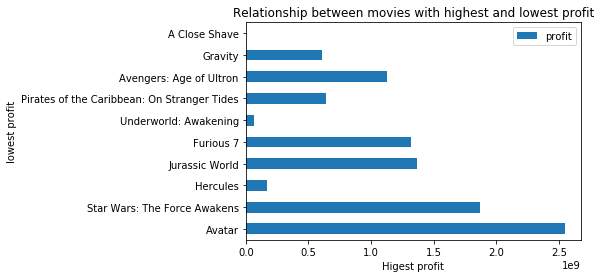

In [66]:
profit_sorted = data['profit'].sort_values(ascending = False)
top_10 = profit_sorted.index[range(10)]
top_10_movies = data.iloc[top_10]
top_10_movies = top_10_movies[['original_title', 'profit']]
print(top_10_movies)
top_10_movies.plot.barh('original_title', 'profit')
plt.title('Relationship between movies with highest and lowest profit')
plt.xlabel('Higest profit')
plt.ylabel('lowest profit')
plt.show()

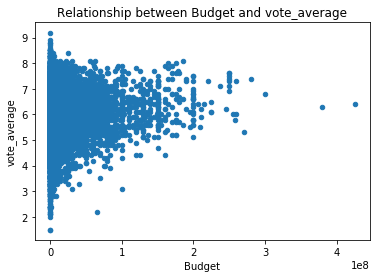

In [72]:
#let plot a scattered to show the relationship between 'budget' and 'vote average'
data.plot.scatter(x='budget', y='vote_average')
plt.title('Relationship between Budget and vote_average')
plt.xlabel('Budget')
plt.ylabel('vote_average')
plt.show()

Conclusions:Finally these dataset contains 10,000 movies,pandas,numpy,matplotlib and seaborn was used to carry out the analysis.These dataset contains 10865 rows, 21columns and 1 duplicated rows.Two questions was asked on the these dataset to find out which year have the highest release movies? and which movies have the higest and lowest profits?. From the graph plot ed the year with the highest release movies are as follows: 2014 has the highest releasesd movies with 700 movies while 2013 has 639 followed by 2015 with 629 movies released. For the seceond question the movie with the highest profit is Avatar, while Warrior's way has the lowest profit.In conclusion i would like to say that these dataset has other question you can ask to get other information about the dataset.

Limitation: The missing values in the data will affect our analysis, if further ivestigation is needed we can perform a statistical test to determine our result whether is statistically significnat. The statistics test can help us determine whether our result in the data are not determined by chance alone.
There rows in the budget columns with zero values, also there are rows with zero value in the revenue column therefor other analysis can still be carried to understnd the dataset.

In [ ]:
References: Kaggle.com, stackflow.com